In [1]:
%load_ext autoreload
%autoreload 2
from src.import_file import *

# Loading data and data cleaning

In [2]:
# load data, skip first row and auto assign dummy col_name
data=pd.read_table('../data/raw/MiniBooNE_PID.txt', header=None,skiprows=1, prefix='F_',sep='\s+')
data.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [3]:
# check if have any null value
data.isnull().values.any()

False

In [4]:
# Assign label 1 to signal events and 0 to background events, before shuffle the instance
data['T']=0
data.loc[:36498,'T']=1

In [5]:
data.describe()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,T
count,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,...,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000
mean,1.251799,-2.107551,123.795041,-3.312518,-3.585353,-3.434412,-2.627901,-2.773691,-0.155680,-3.421357,...,-25.225963,-2.863924,2.393149,-3.585605,-3.416491,-3.753232,-0.744964,-1.987056,-3.364752,0.280623
std,60.119987,59.913094,196.010686,59.834554,59.818130,59.827325,59.876644,59.866946,60.024786,59.828000,...,67.576409,59.873958,60.349468,59.818121,59.828330,59.816001,60.019330,59.946144,59.831409,0.449306
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,4.012528,0.876346,49.295075,0.241571,0.000000,0.085307,0.715269,0.783392,3.284817,0.142853,...,-40.068250,-0.028108,3.413030,0.000000,0.121963,-0.342814,1.420265,0.274271,0.197322,0.000000
50%,4.787715,1.381965,106.135500,0.272089,0.004975,0.141175,0.922700,0.833937,3.426990,0.170561,...,-21.591600,0.459050,4.762385,0.000000,0.168528,0.041723,2.364455,1.123760,0.231328,0.000000
75%,5.628298,1.947870,138.849250,0.315095,0.013136,0.212879,1.180252,0.874198,3.585462,0.199982,...,-3.330192,1.150463,6.857450,0.001984,0.224737,0.294544,3.777613,2.281242,0.263201,1.000000
max,17.057300,8.802820,4747.670000,0.736804,0.179012,0.703859,6.241080,0.989713,7.170170,0.524888,...,161.298000,43.651200,85.823100,0.446914,0.605667,1.932890,21.768200,25.423300,0.625484,1.000000


<pre>After check the summary of the data, I found it is very strange to have a minimum value of -999 for all the features. In fact, when you inspect the data, you would find those are coming from the same instances/records. For example, there are instances have all the values equal to -999 for all 50 features.These cases spread across all the dataset among both two categories. so it doesn't make any sense to include them into our classification job, since it will make no help to identify any of the category since all the feature values of those instance are -999 for both categories. Moreover, it makes it very diffcult to scale features to reasonable values since most feature values are only around 0 to 10. If we don't move those records, the -999 will drag values of these features almost all the same across the dataset after min-max scaling, dragging those values all to 1.  In total, there are 468 rows and I decided to drop them from the dataset for this task.

In [6]:
drop_idx=data[data['F_0']==-999].index
df=data.drop(drop_idx)

In [7]:
df.describe()
# no min as -999 any more, great!

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,T
count,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,...,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000,129596.000000
mean,4.863931,1.492450,127.849703,0.283131,0.009311,0.160797,0.970221,0.823904,3.451369,0.173899,...,-21.709448,0.733346,6.009403,0.009058,0.178782,-0.159174,2.859957,1.613380,0.230708,0.281552
std,1.161277,0.860538,184.363509,0.059554,0.012493,0.122911,0.342953,0.070467,0.258654,0.043707,...,33.858218,1.224392,4.562213,0.029533,0.080407,0.977600,1.917000,1.960976,0.052818,0.449758
min,0.000000,0.059691,0.012381,0.104697,-0.156118,0.000000,0.000000,0.033510,2.375270,0.033432,...,-387.617000,-1.686500,0.249186,0.000000,0.000000,-32.109800,-13.492200,-15.997800,0.000000,0.000000
25%,4.021948,0.882372,49.978850,0.241901,0.001245,0.086348,0.717548,0.783985,3.286500,0.143172,...,-39.847675,-0.022607,3.428092,0.000000,0.122498,-0.336228,1.430775,0.281640,0.197748,0.000000
50%,4.793385,1.385640,106.423000,0.272313,0.005013,0.141468,0.924166,0.834244,3.427935,0.170756,...,-21.456250,0.462485,4.772420,0.000000,0.168887,0.043698,2.372290,1.130715,0.231553,0.000000
75%,5.632045,1.950260,138.994000,0.315312,0.013183,0.213450,1.181228,0.874354,3.586220,0.200121,...,-3.254285,1.153780,6.869710,0.002000,0.224994,0.295472,3.784865,2.286112,0.263353,1.000000
max,17.057300,8.802820,4747.670000,0.736804,0.179012,0.703859,6.241080,0.989713,7.170170,0.524888,...,161.298000,43.651200,85.823100,0.446914,0.605667,1.932890,21.768200,25.423300,0.625484,1.000000


In [8]:
# Shuffle the data and split into training and testing sets
df_shuffle=df.reindex(np.random.permutation(df.index)).reset_index().drop('index',axis=1)

In [9]:
x_train, x_test, y_train, y_test= train_test_split(df_shuffle.drop('T',axis=1), df_shuffle['T'],test_size=0.2, random_state=123)

# Building fine-tuned Random Forest model

In [10]:
# Standardization the data Feed the data into RF and Tune the RF
trans_pipeline = Pipeline(steps=[
        ("StandardScaler", StandardScaler()),
    ])
x_train_prepared=trans_pipeline.fit_transform(x_train)
x_test_prepared=trans_pipeline.transform(x_test)



In [11]:
# Search for the best parameter for RF
# Search for best crierion
param_grid=[
    {'criterion': ['gini','entropy']}    
]
criterion_search=GridSearchCV(DecisionTreeClassifier(max_leaf_nodes=16),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
criterion_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

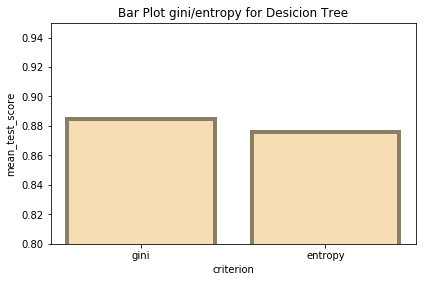

In [12]:
score_parameter_plot(criterion_search.cv_results_,'criterion','Bar Plot gini/entropy for Desicion Tree',0.8,0.95)  

In [13]:
# search for max_depth
param_grid=[
    {'max_depth': [7,8,9,10,11,12,13]}    
]
max_depth_search=GridSearchCV(DecisionTreeClassifier(criterion='gini'),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
max_depth_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

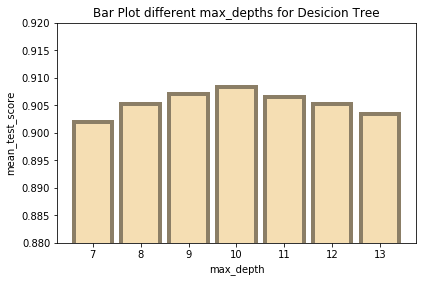

In [14]:
score_parameter_plot(max_depth_search.cv_results_,'max_depth','Bar Plot different max_depths for Desicion Tree',0.88,0.92)    

In [242]:
# search for min_samples_split
param_grid=[
    {'min_samples_split': [50,100,200,250]}    
]
min_samples_split_search=GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
min_samples_split_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'min_samples_split': [50, 100, 200, 250]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

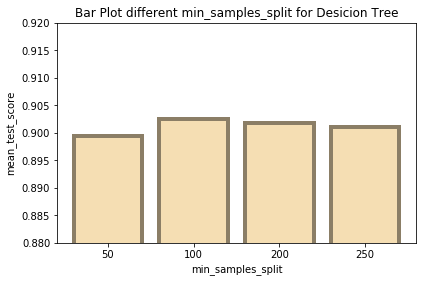

In [243]:
score_parameter_plot(min_samples_split_search.cv_results_,'min_samples_split','Bar Plot different min_samples_split for Desicion Tree',0.88,0.92)

In [251]:
# Search min_samples_leaf
param_grid=[
    {'min_samples_leaf': [30,40,50,60]}    
]
min_samples_leaf_search=GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
min_samples_leaf_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'min_samples_leaf': [30, 40, 50, 60]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

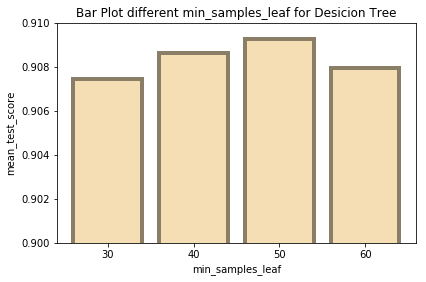

In [252]:
score_parameter_plot(min_samples_leaf_search.cv_results_,'min_samples_leaf','Bar Plot different min_samples_leaf for Desicion Tree',0.9,0.91)    

In [271]:
 # max_leaf_nodes
param_grid=[
    {'max_leaf_nodes': [200,250,300,350,400,450]}    
]
max_leaf_nodes_search=GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
max_leaf_nodes_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_leaf_nodes': [200, 250, 300, 350, 400, 450]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

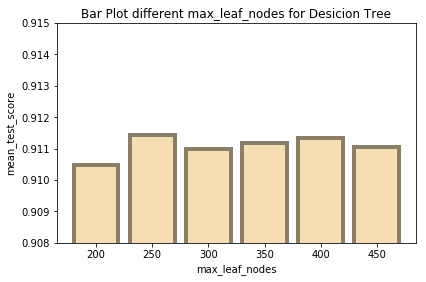

In [272]:
score_parameter_plot(max_leaf_nodes_search.cv_results_,'max_leaf_nodes','Bar Plot different max_leaf_nodes for Desicion Tree',0.908,0.915)    

In [282]:
# Search for n_estimator
param_grid=[{
    'n_estimators': [200,400,600],
}]
rf_n_estimator_search_=GridSearchCV(RandomForestClassifier(),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
rf_n_estimator_search_.fit(x_train_prepared,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [200, 400, 600]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

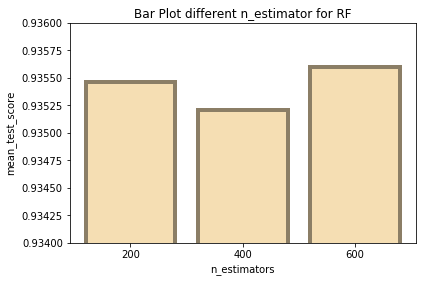

In [284]:
score_parameter_plot(rf_n_estimator_search_.cv_results_,'n_estimators','Bar Plot different n_estimator for RF',0.934,0.936)

In [336]:
# Tuning Random forest classfier
param_grid=[{
    'n_estimators': [50,100,200],
    'min_samples_split': [50,100,200],
    'min_samples_leaf': [30,50,70],
    'max_leaf_nodes': [150,250,350]    
}]
rf_clf=GridSearchCV(RandomForestClassifier(),param_grid,scoring='accuracy',n_jobs=-1,cv=3)
rf_clf.fit(x_train_prepared,y_train)
print(rf_clf.best_params_) 
print(rf_clf.best_score_) 

{'max_leaf_nodes': 350, 'min_samples_leaf': 30, 'min_samples_split': 50, 'n_estimators': 100}
0.9242833442648251


In [345]:
rf_fine_tuned=rf_clf.best_estimator_ 
y_test_pred=rf_fine_tuned.predict(x_test_prepared)
accuracy_score(y_test,y_test_pred)

0.9217978395061729

# Building DNN

In [15]:
# normalization the data and feed the data into DNN
trans_pipeline = Pipeline(steps=[
        ("MinMaxScaler", MinMaxScaler()),
    ])
x_train_prepared=trans_pipeline.fit_transform(x_train)
x_test_prepared=trans_pipeline.transform(x_test)
y_train_prepared=y_train.values
y_test_prepared=y_test.values

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.fit(x_train_prepared, y_train_prepared, epochs=5)
model.evaluate(x_test_prepared, y_test_prepared)

Epoch 1/5
103676/103676 [==============================] - 79s 762us/sample - loss: 0.2275 - acc: 0.9086
Epoch 2/5
103676/103676 [==============================] - 98s 944us/sample - loss: 0.1848 - acc: 0.9254
Epoch 3/5
103676/103676 [==============================] - 98s 949us/sample - loss: 0.1739 - acc: 0.9290 - loss: 0.1739 - acc: 0.92
Epoch 4/5
103676/103676 [==============================] - 74s 712us/sample - loss: 0.1666 - acc: 0.9323
Epoch 5/5
25920/25920 [==============================] - 6s 250us/sample - loss: 0.1692 - acc: 0.9316


[0.1692223530837599, 0.93155867]

# Summary

In [ ]:
# Compare the performance of DNN with the Fine Tuned Random Forest.

<pre>In summary, a well tuned RF model gives a very high score of 0.9217978395061729.
In a very simple deep neural network of two hidden layers, first with 300 LTUs and second with 100 LTUs, with 5 epochs training process, we have a pretty good model slightly beat RF model, with the score of 0.93155867. 
